<h1><center>Assignment for Module 3: Binary Option Pricing Using Monte Carlo Simulation</center></h1> <h3><center>Cédric Verone</center></h3>

This Notebook studies the binary options pricing using the Monte Carlo Simulations. Monte Carlo simulation is an interesting  tool because it allows us to model an asset prices under various risk assumptions in different scenarios.
In this notebook, we use the Euler-Maruyama method to simulate various asset prices' paths and compare them with the theoritical price calculated using the Black-Scholes model. We want to test the impact of the number of paths generated by the Monte Carlo simulation on the pricing accuracy.

In [1]:
# Importing libraries
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.ticker as mtick
from scipy.stats import ttest_1samp

import warnings
warnings.filterwarnings('ignore')

## 1 Introduction to Binary Options

### 1.1 Definition

A binary option is a type of option which is only exercisable at maturity. It does not relate to the delivery of an underlying asset, but the payoff is a monetary amount determined in advance if the option is in the money at the maturity date. If the option is out of the money at expiry, the payoff is zero. <br> There are two types of binary options: <br>- In the case of a cash-or-nothing option, the amount paid by the option is fixed if it is in the money at expiry. <br>-	In the case of an asset-or-nothing option, the option pays the value of the underlying asset if it is in the money at expiry. <br><br> We will focus on the cash-or-nothing options in this notebook.

**Binary cash-or-nothing options payoffs:**

<img src="Payoff formulas.JPG" width=220 height=220 />

Where H is the Heaviside function taking the value of zero for negative arguments and the value one for positive arguments, Q is the value paid by the option if in the money, S_T is the underlying asset price at the expiry and E the strike price.

[Text(0.5, 0, 'Asset Price'), Text(0, 0.5, 'Option Payoff')]

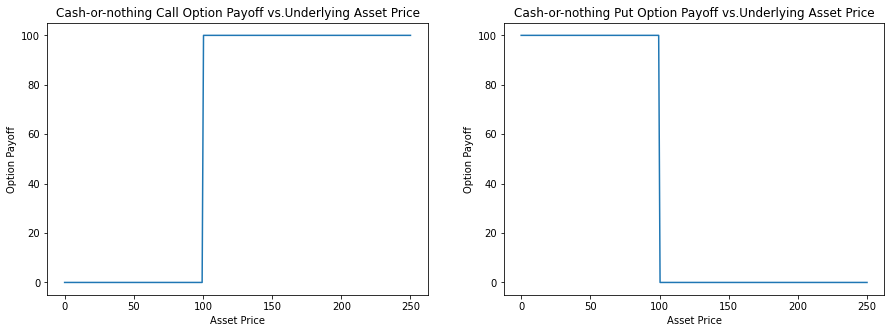

In [2]:
E=100
Q=100
stock_prices = linspace(0,250, 250)
payoff_call_cash = []
payoff_put_cash = []

for price in stock_prices:
    if price >= E:
        payoff_call_cash.append(Q)
    else:
        payoff_call_cash.append(0)
        
    if price <=E:
        payoff_put_cash.append(Q)
    else:
        payoff_put_cash.append(0)
        
fig, axs = plt.subplots(1,2, figsize = (15,5))
axs[0].plot(stock_prices, payoff_call_cash)
axs[0].set_title('Cash-or-nothing Call Option Payoff vs.Underlying Asset Price')
axs[0].set(xlabel="Asset Price", ylabel="Option Payoff")
axs[1].plot(stock_prices, payoff_put_cash)
axs[1].set_title('Cash-or-nothing Put Option Payoff vs.Underlying Asset Price')
axs[1].set(xlabel="Asset Price", ylabel="Option Payoff")

### 1.2 Pricing Theory

As we saw in the lectures, European options price evolution is described by the Black-Scholes equation within the Black-Scholes model framework. It is a partial differential equation which takes the following form for options with non-paying dividend underlying assets:

<img src="BS Equation.JPG" width=275 height=275 />

Where V is the option price, S is the underlying stock price, σ is the volatility of the underlying stock and r is risk-free interest rate.

The closed-form solutions are summarised in the table below:

<img src="BS closed forms.JPG" width=700 height=700 />

### 1.3 Black-Scholes Model Numerical Application

#### Parameters

We will compute the theoritical price for options with the following characteristics:
<br> Today's stock price S0 = 100
<br> Strike S = 100
<br> Time to expiry (T-t) = 1 year
<br> Volatility sigma = 20%
<br> constant risk-free interest rate r = 5%
<br>
<br> We will consider cash-or-nothing options with a payoff value of Q = 100 if the option is in the money and 0 otherwise.

In [3]:
# Define parameters
E = 100.; r = 0.05; T = 1; t=0; Q=100; S=100; sigma = 0.2; 

#### Pricing Function

We define a function to compute the prices of calls and puts for cash-or-nothing and asset-or-nothing options:

In [4]:
def Binary_BS(Q, S, E, r, T, t, sigma):
    d1 = (log(S/E)+(r+(sigma**2)/2)*(T-t))/(sigma * sqrt(T-t))
    d2 = d1 - sigma * sqrt(T-t)
    
    call_cash = Q * exp(-r*(T-t)) * norm.cdf(d2)
    put_cash =  Q * exp(-r*(T-t)) * (norm.cdf(-d2))
  
    return (call_cash, put_cash)

#### Options Prices Calculation

In [5]:
BS = Binary_BS(Q, S, E, r, T, t, sigma)
BS_pricing = pd.DataFrame({'Call': BS[0], 'Put':BS[1]}, index = ['Cash-or-nothing'])
BS_pricing

,Call,Put
Cash-or-nothing,53.232482,41.890461


We can see that the call option have a higher value than the put which is due to the positivity of the risk-free interest rate. 

Now we will compute the option prices varying different parameters. We will later compare them with the results with the Monte Carlo simulation results.

#### Option Prices vs Initial Stock Price

In [6]:
# Define parameters
E = 100.; r = 0.05; T = 1; t=0; Q=100; sigma = 0.2
price = list(linspace(0, 200, 21))

In [7]:
call_cash = []
put_cash = []

for S in price:
    prices = Binary_BS(Q, S, E, r, T, t, sigma)
    call_cash.append(prices[0])
    put_cash.append(prices[1])

    
BS_pricing_price = pd.DataFrame({'Call': call_cash, 
                                      'Put': put_cash},
                                     index = price)

#### Option Prices vs Volatility

In [8]:
# Define parameters
E = 100.; r = 0.05; T = 1; t=0; Q=100; S=100; 
sigmas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [9]:
call_cash = []
put_cash = []

for sigma in sigmas:
    prices = Binary_BS(Q, S, E, r, T, t, sigma)
    call_cash.append(prices[0])
    put_cash.append(prices[1])

    
BS_pricing_volatility = pd.DataFrame({'Call': call_cash, 
                                      'Put': put_cash}, 
                                     index = sigmas)

#### Option Prices vs Strike

In [10]:
# Define parameters
r = 0.05; T = 1; t=0; Q=100; S=100; sigma = 0.2
strikes = linspace(0, 200, 21)

In [11]:
call_cash = []
put_cash = []
call_asset = []
put_asset = []
for E in strikes:
    prices = Binary_BS(Q, S, E, r, T, t, sigma)
    call_cash.append(prices[0])
    put_cash.append(prices[1])
    
BS_pricing_strike = pd.DataFrame({'Call': call_cash, 
                                      'Put': put_cash}, 
                                     index = strikes)

#### Option Prices vs Risk-Free Rate

In [12]:
# Define parameters
t=0; Q=100; S=100; sigma = 0.2; E = 100; T = 1
rfr = linspace(0,1, 101)

In [13]:
call_cash = []
put_cash = []

for r in rfr:
    prices = Binary_BS(Q, S, E, r, T, t, sigma)
    call_cash.append(prices[0])
    put_cash.append(prices[1])

    
BS_pricing_rfr = pd.DataFrame({'Call': call_cash, 
                                      'Put': put_cash}, 
                                     index = rfr)

## 2 Monte Carlo Simulation

### 2.1 Euler-Maruyama Method

The theory states that the underlying stock price S_t follows a lognormal random walk (Geometric Brownian Motion) . Therefore, we can write the following Stochastic Differential Equation (SDE):

<img src="GMB.JPG" width=200 height=200 />

Where W_t is a standard Brownian Motion, dt is the time step size, µ is the drift and sigma the diffusion term. 

We use the risk-free rate as the drift in the equation under the risk-neutral probability measures. We get the following SDE equation:

<img src="GMB 2.JPG" width=200 height=200 />

Where r is the risk-free rate, sigma is constant volatility and S_t is the price of the underlying asset.

The Euler-Murayama method is a numerical method used to approximate the solution of a SDE based on the definition of the Itô’s stochastic integral:

<img src="Ito stochastic.JPG" width=250 height=250 />

The Euler-Maruyama method for simulating the solutions of the SDE is:

<img src="EM formua.JPG" width=275 height=275 />

Where is a random number ϕ~ N(0,1) and ∆t is the time step in discrete time. This method has an error of O(∆t).

### 2.2 Asset Price Simulation

We start by creating a function to simulate multiple asset price's paths over a specified time period. We generate 100,000 simulations.

In [14]:
def Euler_Maruyama(S0, r, sigma, horizon, timesteps, n_sims, seed):
    
    # The seed() method is used to initialise the random number generator
    # Same seed leads to the same set of random values
    random.seed(seed) 
    
    # Set parameters
    T = horizon        # time to expiry in years
    t = timesteps      # number of time steps
    n = n_sims         # number of simulations
    dt = T/t           # size of the time interval
    
    # Simulation of of asset prices
    S = zeros((t+1, n))
    S[0] = S0
    
    for i in range(1, t+1):
        z = random.standard_normal(n)                           # Pseudo random numbers
        S[i] = S[i-1] * (1+ r * dt + sigma * z * sqrt(dt)) # array filled with asset prices
    
    return S

In [15]:
# Set parameters
S0 = 100; r = 0.05; sigma = 0.2; horizon = 1; timesteps = 252; n_sims = 100; seed = 0

In [16]:
stock_prices = Euler_Maruyama(S0, r, sigma, horizon, timesteps, n_sims,seed)

#### Plot 100 simulated assets paths

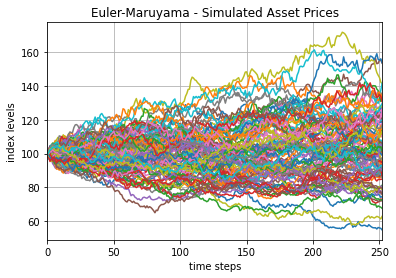

In [17]:
plt.plot(stock_prices)
plt.grid(True)
plt.xlabel('time steps')
plt.xlim(0,252)
plt.ylabel('index levels')
plt.title('Euler-Maruyama - Simulated Asset Prices');

## 3 Binary Option Pricing

The epected value of the discounted payoff under the risk-neutral density Q is:

<img src="Discounted payoff formula.JPG" width=275 height=275 />

In order to price a binary option, we perform the following steps: <br>1. Simulate a large number of price paths following a risk-neutral random walk over the time horizon <br>2. Compute the option's payoff for each price <br>3. Compute the option's expected payoff by averaging the payoffs <br>4. Discount the value with the risk free rate to get the option value

We will consider cash-or-nothing options with a payoff value of Q = 100 if the option is in the money and 0 otherwise.

### 3.1 Numerical Application

For the purpose of this exercise, we perform the options' valuation several times, increasing the number of simulations from 100 to 700 and keeping the other variables stable, so we can measure the impact of the number of simulated paths on the valuation accuracy. For each sample size we will generate 1000 Monte Carlo simulations and take the average.

First we create a function that compute the option prices performing the steps mentioned above.

In [18]:
def Euler_Maruyama_pricing(S, r, sigma, T, t, sims, seed):
    stock_prices = Euler_Maruyama(S, r, sigma, T, t, sims, seed)
    final_prices = stock_prices[-1,:]

    #initialise the price lists
    call_cash = []
    put_cash = []

    
    # cash-or-nothing options
    # payoffs for each simulated price
    payoffs_call_cash = []
    payoffs_put_cash = []
    for price in final_prices:
        if price >= E:
            payoffs_call_cash.append(Q)    
        else:
            payoffs_call_cash.append(0)

        if price <= E:
            payoffs_put_cash.append(Q)
        else:
            payoffs_put_cash.append(0)
            
    # Calculate the discounted value of the expeced payoff
    call_cash.append(exp(-r*T) * mean(payoffs_call_cash))
    put_cash.append(exp(-r*T) * mean(payoffs_put_cash))
    
    return (call_cash, put_cash)

In [19]:
# Define parameters
S = 100; r= 0.05; sigma = 0.2; T = 1; t = 252; E =100; Q=100;
n_sim = list(range(100,800,100))

In [20]:
# define a list of seeds
x = list(linspace(1,1000,1000))

In [21]:
# Pices calculations for increasing numbers of paths simulated
Call_cash = []
Put_cash = []

for sim in n_sim:
    Call_cash_means = []
    Put_cash_means = []

    for seed in x:
        result = Euler_Maruyama_pricing(S, r, sigma, T, t, sim, int(seed))
        Call_cash_means.append(result[0][0])
        Put_cash_means.append(result[1][0])

    
    Call_cash.append(sum(Call_cash_means)/len(Call_cash_means))
    Put_cash.append(sum(Put_cash_means)/len(Put_cash_means))


df_prices = pd.DataFrame({'Call': Call_cash, 
                          'Put': Put_cash}, 
                         index = [str(sim) for sim in n_sim])
df_prices.index.name = 'N simulated paths'
df_prices

,Call,Put
N simulated paths,,
100,53.075748,42.047194
200,53.204164,41.918778
300,53.206701,41.916242
400,53.209396,41.913547
500,53.208350,41.914593
600,53.238567,41.884375
700,53.240039,41.882903


### 3.2 Comparison with Theoritical Prices

In [22]:
# Creation of an empty dataframe
df_error = pd.DataFrame({})

We calculate the % variation (in absolute term) between the prices calculated using the Black-Scholes model and the Monte Carlo simulation using the Euler-Maruyama method.

In [23]:
df_error['Error Call'] = abs(BS[0]/df_prices['Call']-1)
df_error['Error Put'] = abs(BS[1]/df_prices['Put']-1)
 

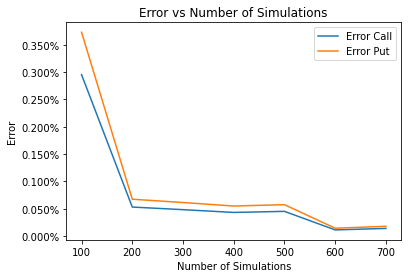

In [24]:
df_error_pct = df_error*100
df_error_pct.set_index = n_sim
ax = df_error_pct.plot()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Error vs Number of Simulations')
plt.xlabel('Number of Simulations')
plt.ylabel('Error')
plt.show()

First, we see that the errors for call and put options are strongly correlated.
As we increase the number of simulations, the difference between Monte Carlo simation prices and Black-Scholes closed-form solution prices is decreasing. We can see a sharpe decrease between 100 and 200 simulations and a lower variation above 200 simulations.

We now compute the average error for call and put options. It will be used later in the notebook for comparison with the Milstein method.

In [25]:
df_error_average = pd.DataFrame(df_error.mean(axis = 0), columns = ['Euler-Maruyama'])
df_error_average

,Euler-Maruyama
Error Call,0.000730
Error Put,0.000924


### 3.2 Statistical Test

The central limit theorem: if we have a population with mean  μ and standard deviation σ and take random samples (with a sufficient size) from the population, then the distribution of the sample means will be close to a normal distribution.

We saw that the option prices calculated using the Monte Carlo simulation seem to converge to Black-Scholes closed-form prices. In order to confirm that observation, we will test the following hypothesis (one sample t-test):

**H0**: Mean of MC option prices = BS option closed-form solution prices <br>
**H1**: Mean of MC option prices ≠ BS option closed-form solution prices <br>
**Number of tails**: 2

The standard error which can be approximated for a large sample by: <br>SE = s / √n<br><br>where n is the sample size and s is the sample's standard deviation<br><br>The test statistic is calculated as follow:<br> t = (x - μ) / SE<br><br> where x is the sample mean and μ is the hypothetic population mean. The null hypothesis is rejected if the t-statistic is greater than the critical value (1.96 under a 95% confidence interval)

The p-value is the probability of observing a value of the test statistics at least as extreme as the results observed.

We run a several Monte Carlo simulations varying the number of paths and perform the two-tail t-test (95% confidence interval). The results are stored in two dataframes below.

#### Test of the mean

In [26]:
means_call = []
means_put = []
Call_cash = []
Put_cash = []

for sim in n_sim:
    Call_cash_means = []
    Put_cash_means = []
    for seed in x:
        result = Euler_Maruyama_pricing(S, r, sigma, T, t, sim, int(seed))
        Call_cash_means.append(result[0][0])
        Put_cash_means.append(result[1][0])
    means_call.append(Call_cash_means)
    means_put.append(Put_cash_means)
    

In [27]:
p_values_call = []
t_set_call = []
p_values_put = []
t_set_put = []

for prices in means_call:
    tset, pval = ttest_1samp(prices, BS[0])
    p_values_call.append(pval)
    t_set_call.append(tset)
    
for prices in means_put:
    tset, pval = ttest_1samp(prices, BS[1])
    p_values_put.append(pval)
    t_set_put.append(tset)



#### Call option mean testing

In [28]:
student_call = pd.DataFrame({'p-values': p_values_call , 't-statistic':t_set_call}, index = [str(sim) for sim in n_sim])
student_call['Hypothesis testing 95% CI'] = student_call['t-statistic'].apply(lambda x: 'Reject H0' if abs(x) > 1.96 else 'Cannot reject H0')
student_call.index.name = 'N simulated paths'
student_call

,p-values,t-statistic,Hypothesis testing 95% CI
N simulated paths,,,
100,0.280788,-1.079136,Cannot reject H0
200,0.788193,-0.268730,Cannot reject H0
300,0.756694,-0.309910,Cannot reject H0
400,0.757703,-0.308583,Cannot reject H0
500,0.719337,-0.359447,Cannot reject H0
600,0.918226,0.102695,Cannot reject H0
700,0.895052,0.131948,Cannot reject H0


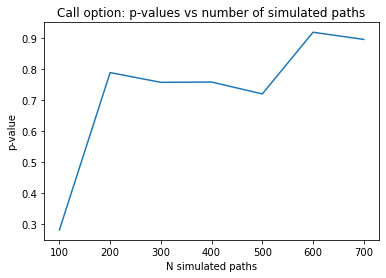

In [29]:
student_call['p-values'].plot()
plt.title('Call option: p-values vs number of simulated paths')
plt.ylabel('p-value')
plt.show()

#### Put option mean testing

In [30]:
student_put = pd.DataFrame({'p-values': p_values_put , 't-statistic':t_set_put}, index = [str(sim) for sim in n_sim])
student_put['Hypothesis testing 95% CI'] = student_put['t-statistic'].apply(lambda x: 'Reject H0' if abs(x) > 1.96 else 'Cannot reject H0')
student_put.index.name = 'N simulated paths'
student_put

,p-values,t-statistic,Hypothesis testing 95% CI
N simulated paths,,,
100,0.280788,1.079136,Cannot reject H0
200,0.788193,0.268730,Cannot reject H0
300,0.756694,0.309910,Cannot reject H0
400,0.757703,0.308583,Cannot reject H0
500,0.719337,0.359447,Cannot reject H0
600,0.918226,-0.102695,Cannot reject H0
700,0.895052,-0.131948,Cannot reject H0


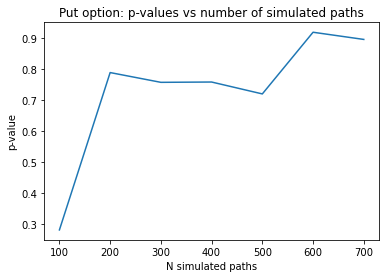

In [31]:
student_put['p-values'].plot()
plt.title('Put option: p-values vs number of simulated paths')
plt.ylabel('p-value')
plt.show()

**Test conclusion**: Considering the tables and charts above, we observe consistent results for both call and put options. The t-statistics are below 1.96 by a significant margin. Based on a two-tailed 95% confidence interval there is no significant evidence to reject the null hypothesis. As we increase the number of simulations the p-values increase which means that the likelihood of failing to reject the null hypothesis decreases.

## 4 Metrics Sensitivity

In this section, we assess how the variation of some parameters impacts the option prices using both the Euler-Maruyama method and the Black-Scholes closed form solutions. We  run 10,000 price paths every to compute the option prices. Charts displaying the option prices vs the parameters are displayed below.<br><br>We summarise the price trends against each parameter in the following table:

<img src="Parameter variations.JPG" width=500 height=500 />

Overall we see similar trends for all parameters, except for the risk-free rate (which increases the the call price for low rates). 
<br>The prices for both methods have very close sensitivities to volatiliy (4.1).
<br>We observe smoother curves for monte carlo simulations which maybe explained by the discontinuous nature of the binary options payoff. For exemple we notice that the call option price starts decreaseing sharply around a strike price of 75 (4.2) under the Black-Scholes model.

### 4.1 Volatility

In [32]:
# Set parameters
S = 100; r= 0.05; T = 1; t = 252; sims = 10000; E=100
sigmas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [33]:
call_cash = []
put_cash = []

for sigma in sigmas:
    result = Euler_Maruyama_pricing(S, r, sigma, T, t, sims, int(seed))
    call_cash.append(result[0][0])
    put_cash.append(result[1][0])
                    
df_prices = pd.DataFrame({'Call': call_cash,'Put': put_cash}, index = sigmas)

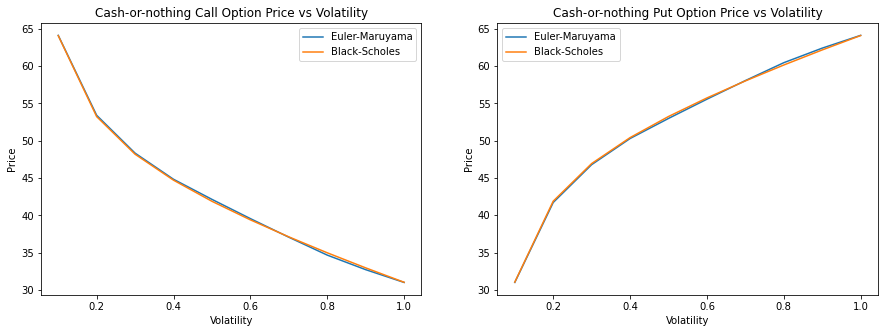

In [34]:
# plot
fig, axs = plt.subplots(1,2, figsize = (15, 5))

axs[0].plot(sigmas, df_prices['Call'], label='Euler-Maruyama')
axs[0].plot(sigmas, BS_pricing_volatility['Call'], label='Black-Scholes')
axs[0].set_title('Cash-or-nothing Call Option Price vs Volatility')
axs[0].set(xlabel="Volatility", ylabel="Price")
axs[0].legend()

axs[1].plot(sigmas, df_prices['Put'], label = 'Euler-Maruyama')
axs[1].plot(sigmas, BS_pricing_volatility['Put'], label = 'Black-Scholes')
axs[1].set_title('Cash-or-nothing Put Option Price vs Volatility')
axs[1].set(xlabel="Volatility", ylabel="Price")
axs[1].legend()

### 4.2 Strike

In [35]:
# Set parameters
S = 100; r= 0.05; T = 1; t = 252; sims = 10000; 
strikes = linspace(0, 200, 21)

In [36]:
call_cash = []
put_cash = []

for E in strikes:
    result = Euler_Maruyama_pricing(S, r, sigma, T, t, sims, int(seed))
    call_cash.append(result[0][0])
    put_cash.append(result[1][0])

df_prices = pd.DataFrame({'Call': call_cash, 
                          'Put': put_cash}, 
     
                         index = strikes)

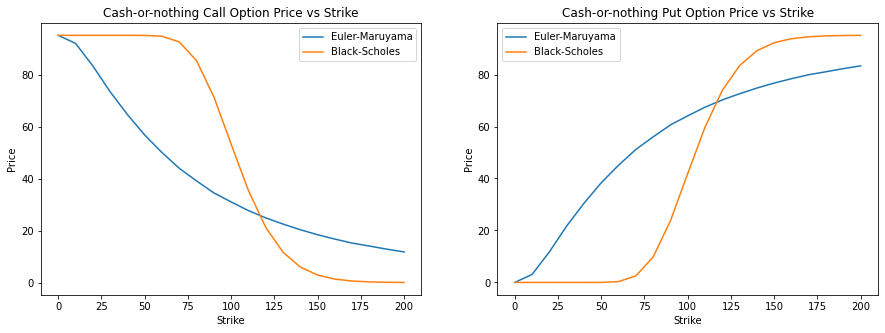

In [37]:
# plot
fig, axs = plt.subplots(1,2, figsize = (15, 5))

axs[0].plot(strikes, df_prices['Call'], label='Euler-Maruyama')
axs[0].plot(strikes, BS_pricing_strike['Call'], label='Black-Scholes')
axs[0].set_title('Cash-or-nothing Call Option Price vs Strike')
axs[0].set(xlabel="Strike", ylabel="Price")
axs[0].legend()

axs[1].plot(strikes, df_prices['Put'], label = 'Euler-Maruyama')
axs[1].plot(strikes, BS_pricing_strike['Put'], label = 'Black-Scholes')
axs[1].set_title('Cash-or-nothing Put Option Price vs Strike')
axs[1].set(xlabel="Strike", ylabel="Price")
axs[1].legend()

### 4.3 Risk-Free Rate

In [38]:
# Set parameters
S = 100; t = 252; sims = 10000; E = 100; T = 1
rfr = linspace(0,1, 101)

In [39]:
call_cash = []
put_cash = []

for r in rfr:
    result = Euler_Maruyama_pricing(S, r, sigma, T, t, sims, int(seed))
    call_cash.append(result[0][0])
    put_cash.append(result[1][0])
    
df_prices = pd.DataFrame({'Call': call_cash, 
                          'Put': put_cash}, 
                         index = rfr)

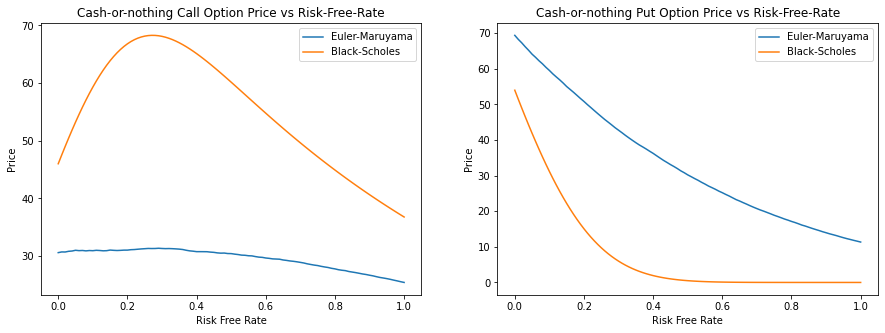

In [40]:
# plot
fig, axs = plt.subplots(1,2, figsize = (15, 5))

axs[0].plot(rfr, df_prices['Call'], label='Euler-Maruyama')
axs[0].plot(rfr, BS_pricing_rfr['Call'], label='Black-Scholes')
axs[0].set_title('Cash-or-nothing Call Option Price vs Risk-Free-Rate')
axs[0].set(xlabel="Risk Free Rate", ylabel="Price")
axs[0].legend()

axs[1].plot(rfr, df_prices['Put'], label = 'Euler-Maruyama')
axs[1].plot(rfr, BS_pricing_rfr['Put'], label = 'Black-Scholes')
axs[1].set_title('Cash-or-nothing Put Option Price vs Risk-Free-Rate')
axs[1].set(xlabel="Risk Free Rate", ylabel="Price")
axs[1].legend()

### 4.4 Initial Stock Price

In [41]:
# Set parameters
t = 252; sims = 10000; E = 100; T = 1; r =0.05
spot = list(linspace(0,200,21))

In [42]:
call_cash = []
put_cash = []

for S in spot:
    result = Euler_Maruyama_pricing(S, r, sigma, T, t, sims, int(seed))
    call_cash.append(result[0][0])
    put_cash.append(result[1][0])
    
df_prices = pd.DataFrame({'Call': call_cash, 
                          'Put': put_cash}, 
                         index = spot)

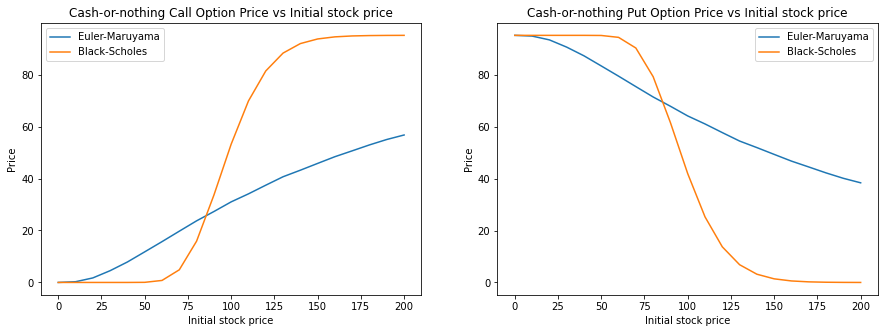

In [43]:
# plot
fig, axs = plt.subplots(1,2, figsize = (15, 5))

axs[0].plot(spot, df_prices['Call'], label='Euler-Maruyama')
axs[0].plot(spot, BS_pricing_price['Call'], label='Black-Scholes')
axs[0].set_title('Cash-or-nothing Call Option Price vs Initial stock price')
axs[0].set(xlabel="Initial stock price", ylabel="Price")
axs[0].legend()

axs[1].plot(spot, df_prices['Put'], label = 'Euler-Maruyama')
axs[1].plot(spot, BS_pricing_price['Put'], label = 'Black-Scholes')
axs[1].set_title('Cash-or-nothing Put Option Price vs Initial stock price')
axs[1].set(xlabel="Initial stock price", ylabel="Price")
axs[1].legend()

## 5 Extension

### 5.1 Milstein Method

The Milstein method is another approach to derive an approximate numerical solution for a SDE based on the definition of the Itô’s stochastic integral.

<img src="Ito stochastic.JPG" width=275 height=275 />

Where X_t is a stochastic process and W_t is a standard Brownian Motion. <br>We apply the Milstein discretization and we get:

<img src="Milstein formula.JPG" width=600 height=600 />

The Milstein method adds a second-order term (ϕ²-1) which corrects the Euler-Maruyama approximation with an error level of O(Δt). <br>Applied to the Geometric Brownian Motion, the Milstein method gives:

<img src="Milstein formula 2.JPG" width=450 height=450 />

### 5.2 Numerical Application

In [44]:
def Milstein(S0, r, sigma, horizon, timesteps, n_sims, seed):
    
    # The seed() method is used to initialise the random number generator
    # Same seed leads to the same set of random values
    random.seed(seed) 
    
    # Set parameters
    T = horizon        # time to expiry in years
    t = timesteps      # number of time steps
    n = n_sims         # number of simulations
    dt = T/t           # size of the time interval
    
    # Simulation of of asset prices
    S = zeros((t+1, n))
    S[0] = S0

    for i in range(1, t+1):
        z = random.standard_normal(n)                           # Pseudo random numbers
        S[i] = S[i-1] * (1+ r * dt + sigma * z * sqrt(dt) + 0.5 * sigma**2 * (z**2 - 1) * dt) # array filled with asset prices
        
    return S

In [45]:
def Milstein_pricing(S, r, sigma, T, t, sims, seed):
    stock_prices = Milstein(S, r, sigma, T, t, sims, seed)
    final_prices = stock_prices[-1,:]

    #initialise the price lists
    call_cash = []
    put_cash = []
    
    # cash-or-nothing options
    # payoffs for each simulated price
    payoffs_call_cash = []
    payoffs_put_cash = []
    for price in final_prices:
        if price >= E:
            payoffs_call_cash.append(Q)    
        else:
            payoffs_call_cash.append(0)

        if price <= E:
            payoffs_put_cash.append(Q)
        else:
            payoffs_put_cash.append(0)
            
    # Calculate the discounted value of the expeced payoff
    call_cash.append(exp(-r*T) * mean(payoffs_call_cash))
    put_cash.append(exp(-r*T) * mean(payoffs_put_cash))
    
    return (call_cash, put_cash)

Now we simulate the stock prices for several number of simulations.

In [46]:
# Define parameters
S = 100; r= 0.05; sigma = 0.2; T = 1; t = 252; E =100; Q=100;
n_sim = list(range(100,800,100))

In [47]:
Call_cash = []
Put_cash = []

for sim in n_sim:
    Call_cash_means = []
    Put_cash_means = []

    for seed in x:
        result = Milstein_pricing(S, r, sigma, T, t, sim, int(seed))
        Call_cash_means.append(result[0][0])
        Put_cash_means.append(result[1][0])

    
    Call_cash.append(sum(Call_cash_means)/len(Call_cash_means))
    Put_cash.append(sum(Put_cash_means)/len(Put_cash_means))


df_prices = pd.DataFrame({'Call': Call_cash, 
                          'Put': Put_cash}, 
                         index = [str(sim) for sim in n_sim])
df_prices.index.name = 'N simulated paths'
df_prices

,Call,Put
N simulated paths,,
100,53.030089,42.092853
200,53.195127,41.927815
300,53.191798,41.931144
400,53.215103,41.907839
500,53.202832,41.920110
600,53.216213,41.906729
700,53.232973,41.889970


In [48]:
df_error['Error Call'] = abs(BS[0]/df_prices['Call']-1)
df_error['Error Put'] = abs(BS[1]/df_prices['Put']-1)

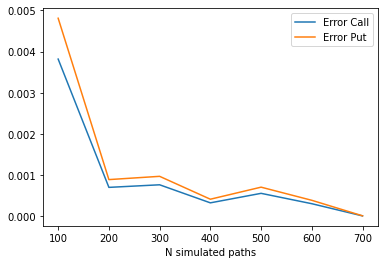

In [49]:
df_error.plot()
plt.show()

In [50]:
df_error_average['Milstein'] = pd.DataFrame(df_error.mean(axis = 0))
df_error_average['Δ'] = df_error_average['Euler-Maruyama'] - df_error_average['Milstein']
df_error_average

,Euler-Maruyama,Milstein,Δ
Error Call,0.000730,0.000926,-0.000196
Error Put,0.000924,0.001170,-0.000246


The Euler-Maruyama and the Milstein methods have the same error profile. The average errors are marginally lower with the Euler-Maruyama method.

## 5 Conclusion

In this notebook, we compared the application of Monte Carlo simulations with the Black-Scholes closed form solutions within the context of binary option pricing . We observed that Monte Carlo simulations' accuracy was high for cash-or-nothing option pricing and we validated that fact with a t-test. The t-test results suggest that there is no significant evidence to reject the fact that Monte Carlo priced and Black-Scholes prices have the same mean. We also observed that the prices using these two methods are converging as we increase the number of simulations. Especially, there is a significant decrease of the error between 100 and 200 simulated paths. This is confirmed by the increasing p-value when we increase the number of simulations. The Monte Carlo simulation based on the Milstein method gives almost similar option values. <br> We observe that the price sensitivities to underlying paramaters follow the similar trends for Monte Carlo simulations and Black-Scholes models. We notice smoother curves for Monte Carlo simulations. 

**References:** <br>[1] John C. Hull., Options, Futures, and Other Derivatives, 5th Edition <br> [2] Fischer Black and Myron Scholes., The Pricing of Options and Corporate Liabilities
<br> [3] Paul Wilmott., Paul Wilmott introduces quantitative finance: 2nd Edition
<br> [4] Dominique Fourdrinier., Statistique inférentielle : Cours et exercices corrigés
<br> [5] Mustafa Bayram, Tugcem Partal & Gulsen Orucova Buyukoz., Numerical methods for simulation of stochastic differential equations